# Computer infrastructure: Assessment

Assessment project for the course "Computer Infrastruture" of the Higher Diploma of Science in Computing for Data Analytics, ATU Galway-Mayo, 2025/2026. 

## Module import

The packages required to run the code are imported in the notebook. These include:
- Yfinance: to pull data from Yahoo Finance
- Pandas and Numpy: to manipulate data 
- Os and Datetime: to save files and access directories 
- Re: regular expressions [REMOVE]
- Matplotlib: to plot the data 

In [1]:
# import libraries
import yfinance as yf
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
import re 

## Problem 1: Data from yfinance

**About yfinance** 

Yfinance is a python library that pulls data from the Yahoo Finance API and makes it availale and ready-to-use within python code. The package is not officially linked to the Yahoo Finance organization, but the is updated with regular commits. 

The package can be installed from here: https://pypi.org/project/yfinance/. Documentation can be found here: https://ranaroussi.github.io/yfinance/index.html. 

### Get_data()

The function get_data() is created to pull hourly data from the past five days for the FAANG stocks (Facebook/Meta, Apple, Amazon, Netflix, Google). 


In [2]:
# create variable for the FAANG stocks: META, AAPL, AMZN, NFLX, GOOG. 
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

# show ticker object
tickers

yfinance.Tickers object <META,AAPL,AMZN,NFLX,GOOG>

In [3]:
# create function to get hourly data from the past 5 days for the FAANG stocks. 

def get_data(tickers): 
    # yfinance.download: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download 
    df_with_intervals = tickers.download(period='5d', interval='60m')

    # Verify if a data folder exists, and if not, create one. 
    # See: https://stackoverflow.com/questions/273192/how-do-i-create-a-directory-and-any-missing-parent-directories 
    if not os.path.exists('data'):
        os.makedirs('data')
    
    # save dataframe to csv
    # set path to folder 
    folder_path = 'data/'
    # set file name with time and date. See: https://www.w3schools.com/python/python_datetime.asp
    file_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.csv'

    full_path = folder_path + file_name

    # save dataframe to csv: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.htm
    df_with_intervals.to_csv(full_path)

In [4]:
# execute the function 
get_data(tickers)

[*********************100%***********************]  5 of 5 completed


**About yfinance.download()**

The download method allows to dowload market information for a or multiple ticker objects (the variable *tickers*, in this case). Among the possible arguments, the method allows to select specific periods of time and interval. The output is a table, which is data represented in a tabular format. 

In this case, the variable **df_with_intervals** is a table where each row corresponds to one-hour intervals in the past 5 (working) days. Hourly intervals are pulled only during the opening hours of the stock market (13:30-19:30). Each column displays, for every stock, the following data: 

- Close
- Dividends 
- High
- Low
- Open
- Stock Splits
- Volume 

## Problem 2: Plotting the data



In this section, the most recent data saved is plotted. 

### Sourcing the data

The package *os* is used to find the most recent file in the data folder, based on the timestamp in the name. 


In [5]:
# List all files in the data folder (see: https://www.geeksforgeeks.org/python/python-os-listdir-method/)
tickers_data = os.listdir('data')
# select the most recent file (see: https://stackoverflow.com/questions/39327032/how-to-get-the-latest-file-in-a-folder)
latest_tickers_data = max(tickers_data)

### Working with the data

The most recent data downloaded from Yahoo Finance and saved to a .csv file is opened as a Pandas dataframe. Pandas allows to read different types of strucutred data (including tabular data and json data), manipulate and plot it. 

The import is set as followed: 
- the first 2 rows of the data are set as headers (the first row identifies the stock data points, the second each stock),
- the first column (datetime) is set as Index: this means that the date is the index (or identifier) of each row and can be used to identify rows. 
- the index (datetime) is read and imported not as object (string) but as datetime. This is required to capture tha data as a date/time, and perform calculations like resampling or rolling, if required.  (see: https://pandas.pydata.org/docs/user_guide/timeseries.html#overview). 

In [6]:
# import the data from csv to pandas dataframe 
# the first 3 rows are read as headers: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
# datetime is used as index. 
df_latest_tickers = pd.read_csv('data/' + latest_tickers_data, header=[0,1], index_col=0, parse_dates=True)

# preview data 
df_latest_tickers.head()

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-10 14:30:00+00:00  277.450012  231.735001  318.739990  651.317505   
2025-12-10 15:30:00+00:00  278.257690  231.660004  318.600006  652.849182   
2025-12-10 16:30:00+00:00  278.526489  230.720001  317.075104  650.250000   
2025-12-10 17:30:00+00:00  278.119995  230.335007  316.700012  644.843811   
2025-12-10 18:30:00+00:00  278.220001  230.264999  318.609985  645.489990   

Price                                Dividends                      ...  \
Ticker                          NFLX      AAPL AMZN GOOG META NFLX  ...   
Datetime                                                            ...   
2025-12-10 14:30:00+00:00  95.525002       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-10 15:30:00+00:00  94.949997       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-10 16:30:00+00:00  94.790001       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-10 17:30:00+00:00  94.220001       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-10 18:30:00+00:00  93.474998       0.0  0.0  0.0  0.0  0.0  ...   

Price                     Stock Splits                       Volume           \
Ticker                            AAPL AMZN GOOG META NFLX     AAPL     AMZN   
Datetime                                                                       
2025-12-10 14:30:00+00:00          0.0  0.0  0.0  0.0  0.0  3868165  7146039   
2025-12-10 15:30:00+00:00          0.0  0.0  0.0  0.0  0.0  1880040  2842036   
2025-12-10 16:30:00+00:00          0.0  0.0  0.0  0.0  0.0  1611918  1702459   
2025-12-10 17:30:00+00:00          0.0  0.0  0.0  0.0  0.0  1374275  1515784   
2025-12-10 18:30:00+00:00          0.0  0.0  0.0  0.0  0.0  1631790  2879222   

Price                                                 
Ticker                        GOOG     META     NFLX  
Datetime                                              
2025-12-10 14:30:00+00:00  2497344  1971573  8028921  
2025-12-10 15:30:00+00:00   887438  1226649  6148312  
2025-12-10 16:30:00+00:00   900377   638304  3158059  
2025-12-10 17:30:00+00:00   711869  1159629  4973469  
2025-12-10 18:30:00+00:00  1057225  1289902  7085060  

[5 rows x 35 columns]

Headers explored to know more about the columns (or series). 

In [7]:
# list colums. see: https://stackoverflow.com/questions/19482970/get-a-list-from-pandas-dataframe-column-headers
headers = list(df_latest_tickers)

headers

[('Close', 'AAPL'),
 ('Close', 'AMZN'),
 ('Close', 'GOOG'),
 ('Close', 'META'),
 ('Close', 'NFLX'),
 ('Dividends', 'AAPL'),
 ('Dividends', 'AMZN'),
 ('Dividends', 'GOOG'),
 ('Dividends', 'META'),
 ('Dividends', 'NFLX'),
 ('High', 'AAPL'),
 ('High', 'AMZN'),
 ('High', 'GOOG'),
 ('High', 'META'),
 ('High', 'NFLX'),
 ('Low', 'AAPL'),
 ('Low', 'AMZN'),
 ('Low', 'GOOG'),
 ('Low', 'META'),
 ('Low', 'NFLX'),
 ('Open', 'AAPL'),
 ('Open', 'AMZN'),
 ('Open', 'GOOG'),
 ('Open', 'META'),
 ('Open', 'NFLX'),
 ('Stock Splits', 'AAPL'),
 ('Stock Splits', 'AMZN'),
 ('Stock Splits', 'GOOG'),
 ('Stock Splits', 'META'),
 ('Stock Splits', 'NFLX'),
 ('Volume', 'AAPL'),
 ('Volume', 'AMZN'),
 ('Volume', 'GOOG'),
 ('Volume', 'META'),
 ('Volume', 'NFLX')]

In [8]:
# Create a new "Date" column to modify datetime format
# see: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.findall.html 
df_latest_tickers['Date'] = df_latest_tickers.index.astype(str).str.findall(r'\d{4}\-\d{2}\-\d{2} \d{2}:\d{2}').str[0]
# Create a Close_datetime columns to capture only EOD close price (at 19:30)
df_latest_tickers['Close_datetime'] = df_latest_tickers.index.astype(str).str.findall(r'\d{4}\-\d{2}\-\d{2} \d[9]:\d{2}').str[0].fillna(' ')

# show new columns. see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html 
df_latest_tickers.head(5)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-10 14:30:00+00:00  277.450012  231.735001  318.739990  651.317505   
2025-12-10 15:30:00+00:00  278.257690  231.660004  318.600006  652.849182   
2025-12-10 16:30:00+00:00  278.526489  230.720001  317.075104  650.250000   
2025-12-10 17:30:00+00:00  278.119995  230.335007  316.700012  644.843811   
2025-12-10 18:30:00+00:00  278.220001  230.264999  318.609985  645.489990   

Price                                Dividends                      ...  \
Ticker                          NFLX      AAPL AMZN GOOG META NFLX  ...   
Datetime                                                            ...   
2025-12-10 14:30:00+00:00  95.525002       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-10 15:30:00+00:00  94.949997       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-10 16:30:00+00:00  94.790001       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-10 17:30:00+00:00  94.220001       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-10 18:30:00+00:00  93.474998       0.0  0.0  0.0  0.0  0.0  ...   

Price                     Stock Splits             Volume                    \
Ticker                            GOOG META NFLX     AAPL     AMZN     GOOG   
Datetime                                                                      
2025-12-10 14:30:00+00:00          0.0  0.0  0.0  3868165  7146039  2497344   
2025-12-10 15:30:00+00:00          0.0  0.0  0.0  1880040  2842036   887438   
2025-12-10 16:30:00+00:00          0.0  0.0  0.0  1611918  1702459   900377   
2025-12-10 17:30:00+00:00          0.0  0.0  0.0  1374275  1515784   711869   
2025-12-10 18:30:00+00:00          0.0  0.0  0.0  1631790  2879222  1057225   

Price                                                    Date Close_datetime  
Ticker                        META     NFLX                                   
Datetime                                                                      
2025-12-10 14:30:00+00:00  1971573  8028921  2025-12-10 14:30                 
2025-12-10 15:30:00+00:00  1226649  6148312  2025-12-10 15:30                 
2025-12-10 16:30:00+00:00   638304  3158059  2025-12-10 16:30                 
2025-12-10 17:30:00+00:00  1159629  4973469  2025-12-10 17:30                 
2025-12-10 18:30:00+00:00  1289902  7085060  2025-12-10 18:30                 

[5 rows x 37 columns]

In [9]:
# create a subset for EOD data  (19:30) only 
eod_tickers = df_latest_tickers[df_latest_tickers['Close_datetime'] != ' ']
# remove time from "Date" to keep day only 
eod_tickers.loc[:,('Date')] = eod_tickers['Date'].replace(to_replace=' .+$', value='', regex=True)

eod_tickers.head(5)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-10 19:30:00+00:00  278.980011  231.919998  320.510010  647.919983   
2025-12-11 19:30:00+00:00  278.095001  229.692505  313.350006  650.549988   
2025-12-12 19:30:00+00:00  278.054993  226.712006  310.799988  645.349976   
2025-12-15 19:30:00+00:00  273.804993  222.664993  309.364990  650.994995   
2025-12-16 19:30:00+00:00  274.559998  222.649200  307.019989  658.859985   

Price                                Dividends                      ...  \
Ticker                          NFLX      AAPL AMZN GOOG META NFLX  ...   
Datetime                                                            ...   
2025-12-10 19:30:00+00:00  93.409897       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-11 19:30:00+00:00  93.849998       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-12 19:30:00+00:00  95.665100       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-15 19:30:00+00:00  93.695000       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-16 19:30:00+00:00  94.445000       0.0  0.0  0.0  0.0  0.0  ...   

Price                     Stock Splits             Volume                    \
Ticker                            GOOG META NFLX     AAPL     AMZN     GOOG   
Datetime                                                                      
2025-12-10 19:30:00+00:00          0.0  0.0  0.0  2578278  3311589  1555562   
2025-12-11 19:30:00+00:00          0.0  0.0  0.0  1817634  1703233  1218542   
2025-12-12 19:30:00+00:00          0.0  0.0  0.0  2391168  1797710   722659   
2025-12-15 19:30:00+00:00          0.0  0.0  0.0  2804616  2085163  1052803   
2025-12-16 19:30:00+00:00          0.0  0.0  0.0  1912589  2057955   927742   

Price                                              Date    Close_datetime  
Ticker                        META     NFLX                                
Datetime                                                                   
2025-12-10 19:30:00+00:00  1545291  7418112  2025-12-10  2025-12-10 19:30  
2025-12-11 19:30:00+00:00   639281  3095959  2025-12-11  2025-12-11 19:30  
2025-12-12 19:30:00+00:00   670874        0  2025-12-12  2025-12-12 19:30  
2025-12-15 19:30:00+00:00   713982  2256363  2025-12-15  2025-12-15 19:30  
2025-12-16 19:30:00+00:00  1153621  1691173  2025-12-16  2025-12-16 19:30  

[5 rows x 37 columns]

### Hourly Close price

In [10]:
# plot hourly close price 

def plot_close_price(date, close_price):

    fig, ax = plt.subplots()
    ax.plot(date, close_price)
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Close Price (USD)')
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
    ax.legend(labels = ["AAPL", "AMZN", "GOOG", "META", "NFLX"], fontsize = 'x-small', loc = "center right")
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html 
    ax.set_xticks(date, labels = date, rotation = 90) 

    ax.set_title('FAANG Stocks - Close price over last 5 days')

    # save plot 
    image_name = latest_tickers_data.strip('.csv') + '.png'
    plt.savefig("images/plots/"+ image_name, dpi=100)

    # show plot 
    plt.show()

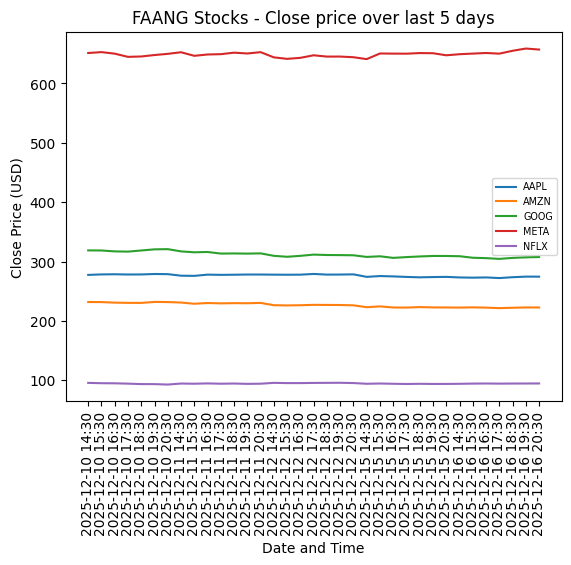

In [11]:
# get subset for closing prices 
close_price = df_latest_tickers['Close']
# get index (date and time)
date = df_latest_tickers['Date']

# execute the function 
plot_close_price(df_latest_tickers['Date'], df_latest_tickers['Close'])

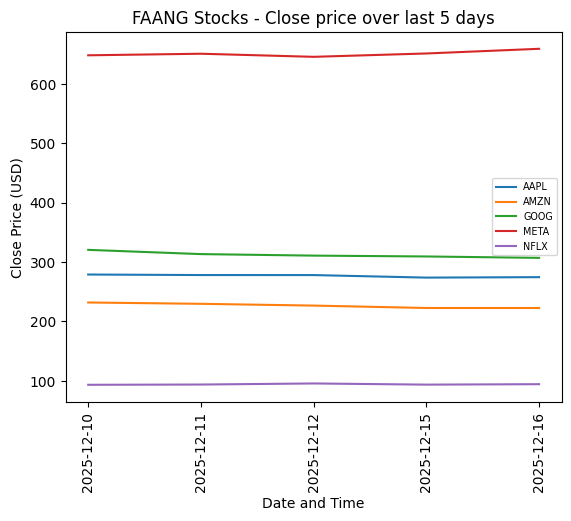

In [12]:
# [REMOVE]
# Plot EOD close price 

# get subset for closing prices 
close_price = eod_tickers['Close']
# get index (date and time)
eod_date = eod_tickers['Date']

fig, ax = plt.subplots()
ax.plot(eod_date, close_price)
ax.set_xlabel('Date and Time')
ax.set_ylabel('Close Price (USD)')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
ax.legend(labels = ["AAPL", "AMZN", "GOOG", "META", "NFLX"], fontsize = 'x-small')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html 
ax.set_xticks(eod_date, labels = eod_date, rotation = 'vertical') 

ax.set_title('FAANG Stocks - Close price over last 5 days')

plt.show()

### EOD Close price

In [13]:
# Plot EOD close price in subplots 

# See: https://chatgpt.com/share/6910e526-a2d0-800f-be66-94ac6a06bf9c 
# To add: percentage variation in value at EOD close price

# Create arrays for variables
aapl = eod_tickers[('Close','AAPL')]
amzn = eod_tickers[('Close','AMZN')]
goog = eod_tickers[('Close','GOOG')]
meta = eod_tickers[('Close','META')]
nflx = eod_tickers[('Close','NFLX')]

data = [aapl, amzn, goog, meta, nflx]
titles = ['AAPL', 'AMZN', 'GOOG', 'META', 'NFLX']


In [14]:

# Function to plot the data 

def plot_close_price_subplots(data, titles):
# Put data and titles in lists for easy looping

    # Create subplots: 2 rows, 3 columns, but we'll hide the last (empty) one
    fig, axs = plt.subplots(2, 3, figsize=(14, 8))

    # Flatten the 2D array of axes for easy iteration
    axs = axs.flatten()

    # Plot each stock
    for i, (ax, series, title) in enumerate(zip(axs, data, titles)):
        ax.plot(eod_date, series)
        ax.set_title(title)
        ax.tick_params(axis='x', rotation=90)

    # Hide the last unused subplot (the 6th one)
    axs[-1].set_visible(False)

    # Adjust spacing between plots
    fig.tight_layout(pad=3.0)

    # save image 
    image_name = latest_tickers_data.strip('.csv') + '_subplots.png'
    plt.savefig("images/plots/"+ image_name)

    
    plt.show()

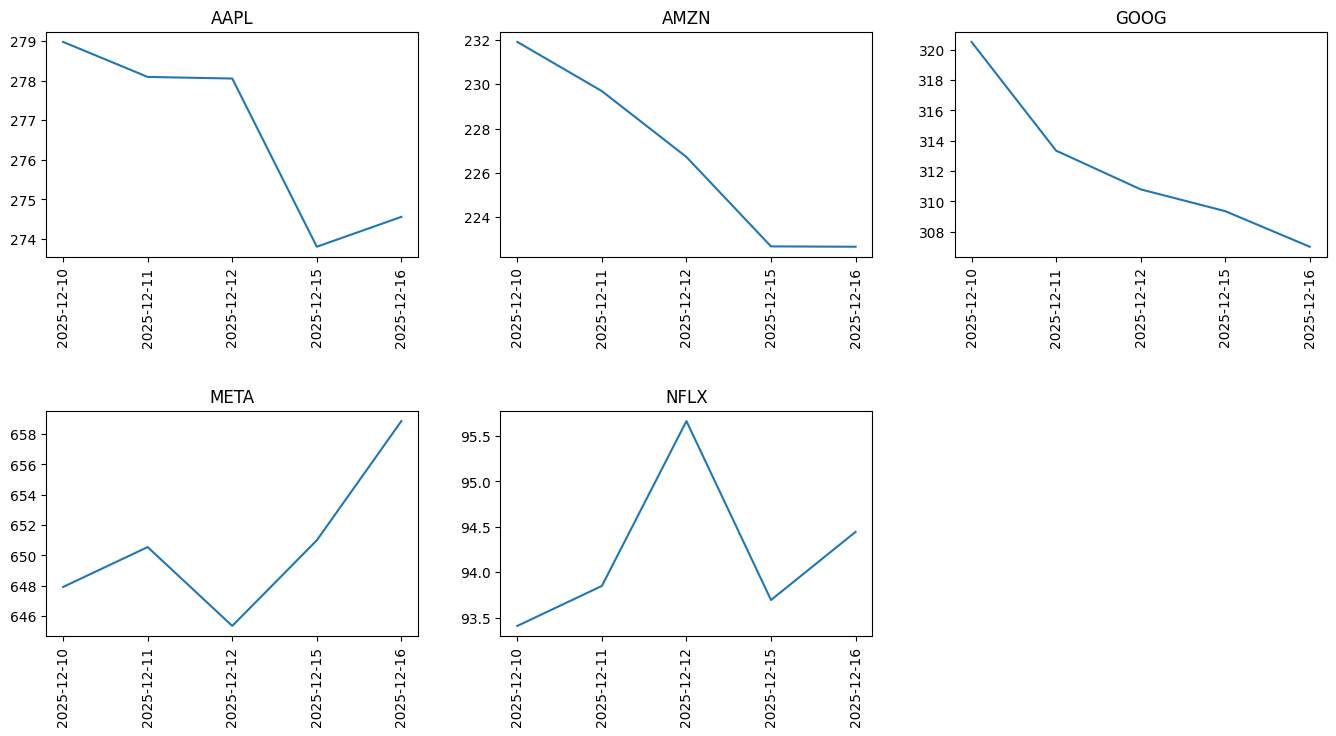

In [15]:
plot_close_price_subplots(data, titles)

## Problem 3: Script 

In this section the python file *faang.py* is created in the root of the repository and the code created so far added to the script.

The code is set up in a way that will allow to later automate the script execution with GitHub workflows. At the end of this section, the current user can execute the code and get an output reaching the root of the repository and typing *./faang.py*. 

### Creating the python file 

First, the python file *faang.py* is created in the root node of the repository. Then, the code created tso far to save and plot data from Yahoo Finance is added to the script. This means that, at this stage, a user can execute the code typing in the terminal the following command: *python faang.py*. 

The following steps aim to make the file executable. This means that a user will not need to execute the program with the command above, but simply opening the file directory: *./faang.py*. 


### Adding the Shebang

To make the code executable, a **Shebang** is added on the first line of the python file. The Shebang tells the system which interpreter should be used to read the code, so that the system can search for the interpreter in the user directory.

The most important requirements when using Shebang are: 
- it needs to be added exactly on the first line of the code, otherwise it won't work,
- the best Shebang for portability is: *#! /usr/bin/env pytho* (or *python3*),
- it will be ignored on Windows systems, unless compatibility layers are added. 

Source: https://realpython.com/python-shebang/. 


![shebang](/workspaces/computer-infrastructure/images/other/3_shebang.png)

### Adding execute permission

The second step to make the file executable is to modify the file permissions. The current permissions can be viewe with the command: 

*ls -l*. 


![current permissions](/workspaces/computer-infrastructure/images/other/3_permissions.png)

The predefined permissions are usually only read and write (-rw). To make the file exectuable, the following command is used: 

*chmod u+x filename.sh*



This command makes the file executable only for the owner. To make it executable by everyone, the command would be: 

*chmod +x filename.sh*

Source: https://share.google/aimode/3Ibdw9179iM9uMZt0.

![3_permissions_after](/workspaces/computer-infrastructure/images/other/3_permissions_after.png)

### Test the code

Finally, the code is tested locating the root in the directory and typing: 

*./faang.py*

It is not unsual to have issues when making a file executable, often because the Shebang is not set up properly. 

![test](/workspaces/computer-infrastructure/images/other/3_test_code.png)

## Problem 4: Automation

Steps: 

- create the folder .github and workflows, inside. https://docs.github.com/en/actions/get-started/quickstart 
- create yamfl file inside. Describe elements  of yaml file
- commit and push --> make sure .github is not added to the .gitignore file 
- check out repo on github, it now has a Actions button 
- check out the workflows and the runs 
- add option to manually test the workflow: workflow dispatch --> difference between push and manual run
- explore the actions to verify everything is running as expected 

- Possible issues: naming conventions and directories, permissions...

## End